In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
genre_list = ['Magia', 'Mecha', 'Demonios',
       'Género Bender', 'Realidad Virtual', 'Drama', 'Niños', 'Guerra',
       'Harem', 'Vampiros', 'Horror', 'Acción', 'Realidad', 'Traps', 'Militar',
       'Crimen', 'Recuentos de la vida', 'Apocalíptico', 'Psicológico',
       'Misterio', 'Musica', 'Extranjero', 'Samurái', 'Girls Love',
       'Telenovela', 'Policiaco', 'Animación', 'Parodia', 'Deporte',
       'Supervivencia', 'Aventura', 'Oeste', 'Superpoderes', 'Ecchi',
       'Tragedia', 'Fantasia', 'Gore', 'Boys Love', 'Reencarnación',
       'Sobrenatural', 'Vida Escolar', 'Historia', 'Romance',
       'Ciencia Ficción', 'Thriller', 'Ciberpunk', 'Artes Marciales',
       'Comedia', 'Familia']

In [3]:
book_df = pd.read_csv("../data/raw/dataset_4.csv", index_col="Unnamed: 0")
chapters_df = pd.read_csv("../data/raw/dataset_chapters.csv", index_col="Unnamed: 0")
multy_chapters_df = pd.read_csv("../data/raw/dataset_multy_chapters.csv", index_col="Unnamed: 0")

'demography', 'type', 'read', 'pending', 'following', 'favorite', 'have', 'abandoned',

'score'

In [4]:
print(len(book_df.columns))
print(book_df.columns)


64
Index(['synopsis', 'demography', 'type', 'name', 'genre', 'score',
       'book_status', 'book_cover', 'read', 'pending', 'following', 'favorite',
       'have', 'abandoned', 'uuid', 'Magia', 'Mecha', 'Demonios',
       'Género Bender', 'Realidad Virtual', 'Drama', 'Niños', 'Guerra',
       'Harem', 'Vampiros', 'Horror', 'Acción', 'Realidad', 'Traps', 'Militar',
       'Crimen', 'Recuentos de la vida', 'Apocalíptico', 'Psicológico',
       'Misterio', 'Musica', 'Extranjero', 'Samurái', 'Girls Love',
       'Telenovela', 'Policiaco', 'Animación', 'Parodia', 'Deporte',
       'Supervivencia', 'Aventura', 'Oeste', 'Superpoderes', 'Ecchi',
       'Tragedia', 'Fantasia', 'Gore', 'Boys Love', 'Reencarnación',
       'Sobrenatural', 'Vida Escolar', 'Historia', 'Romance',
       'Ciencia Ficción', 'Thriller', 'Ciberpunk', 'Artes Marciales',
       'Comedia', 'Familia'],
      dtype='object')


In [5]:
book_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19039 entries, 0 to 19072
Data columns (total 64 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   synopsis              19038 non-null  object 
 1   demography            19039 non-null  object 
 2   type                  19039 non-null  object 
 3   name                  19039 non-null  object 
 4   genre                 18954 non-null  object 
 5   score                 19039 non-null  float64
 6   book_status           19039 non-null  object 
 7   book_cover            19039 non-null  object 
 8   read                  19039 non-null  float64
 9   pending               19039 non-null  float64
 10  following             19039 non-null  float64
 11  favorite              19039 non-null  float64
 12  have                  19039 non-null  float64
 13  abandoned             19039 non-null  float64
 14  uuid                  19039 non-null  object 
 15  Magia              

In [6]:
book_df.describe()

score          read       pending      following      favorite  \
count  19039.000000  19039.000000  19039.000000   19039.000000  19039.000000   
mean       6.320739   1381.689900   2003.844320    3948.597563   1035.377961   
std        3.806957   2775.152915   3031.309175    7954.802081   2542.668126   
min        0.000000      0.000000      2.000000       1.000000      0.000000   
25%        1.000000    134.000000    367.000000     418.000000     54.000000   
50%        8.270000    485.000000    911.000000    1200.000000    225.000000   
75%        9.000000   1500.000000   2300.000000    3800.000000    940.000000   
max       10.000000  97500.000000  42700.000000  137900.000000  68100.000000   

               have     abandoned  
count  19039.000000  19039.000000  
mean     419.700930    247.333053  
std      770.357712    446.928328  
min        0.000000      0.000000  
25%       33.000000     25.000000  
50%      122.000000     77.000000  
75%      453.000000    252.000000  
max    11300.000000   7000.000000

In [7]:
total_chapters_df = pd.concat([chapters_df, multy_chapters_df])

In [8]:
chapters_count = total_chapters_df.groupby(["uuid"])["uuid"].count()
chapters_uuid = chapters_count.index

In [9]:
chapters_count_df = pd.DataFrame({"chapters_count": chapters_count})

In [10]:
data_df = book_df.join(chapters_count_df, on='uuid')

In [11]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19039 entries, 0 to 19072
Data columns (total 65 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   synopsis              19038 non-null  object 
 1   demography            19039 non-null  object 
 2   type                  19039 non-null  object 
 3   name                  19039 non-null  object 
 4   genre                 18954 non-null  object 
 5   score                 19039 non-null  float64
 6   book_status           19039 non-null  object 
 7   book_cover            19039 non-null  object 
 8   read                  19039 non-null  float64
 9   pending               19039 non-null  float64
 10  following             19039 non-null  float64
 11  favorite              19039 non-null  float64
 12  have                  19039 non-null  float64
 13  abandoned             19039 non-null  float64
 14  uuid                  19039 non-null  object 
 15  Magia              

In [12]:
data_df['chapters_count'] = data_df['chapters_count'].fillna(0)

In [13]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19039 entries, 0 to 19072
Data columns (total 65 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   synopsis              19038 non-null  object 
 1   demography            19039 non-null  object 
 2   type                  19039 non-null  object 
 3   name                  19039 non-null  object 
 4   genre                 18954 non-null  object 
 5   score                 19039 non-null  float64
 6   book_status           19039 non-null  object 
 7   book_cover            19039 non-null  object 
 8   read                  19039 non-null  float64
 9   pending               19039 non-null  float64
 10  following             19039 non-null  float64
 11  favorite              19039 non-null  float64
 12  have                  19039 non-null  float64
 13  abandoned             19039 non-null  float64
 14  uuid                  19039 non-null  object 
 15  Magia              

In [14]:
data_df

synopsis demography    type  \
0      Akihito es un vendedor reconocido por sus comp...      Josei   MANGA   
1      "Un amor no correspondido es como un Metro que...      Josei   MANGA   
2      "Creo que he encontrado una excelente manera d...      Josei   MANGA   
3      “Encontré un gran pene (Amante) destinado” Un ...      Josei   MANGA   
4      No existe tal cosa como una hermana mayor que ...      Josei   MANGA   
...                                                  ...        ...     ...   
19068  El juego para móviles "Let's Catch the demon" ...    Shounen  MANHUA   
19069  Debido a una misteriosa carta, la novia de Xia...    Shounen  MANHUA   
19070  De Chinatown KM: 17 años Qianchun, se pierde e...    Shounen  MANHUA   
19071  Los zombien invanden, los alimentos se acaban,...    Shounen  MANHUA   
19072  Hondanaka Koyuki es una espía aprendiz de 18 a...    Shounen  MANHUA   

                                                    name  \
0                                Half Cigarette ( 2015 )   
1                                   Renai Metro ( 2015 )   
2       Kainarasu Hazuga Aegasarete Komattemasu ( 2018 )   
3                           Centímetros de Amor ( 2016 )   
4      Su hermana mayor está enamorada de ella, pero ...   
...                                                  ...   
19068                                      Yuling Diario   
19069                                   Die Now ( 2016 )   
19070                                      Yiwu ( 2017 )   
19071                               Undead King ( 2014 )   
19072                               Spicy Spies ( 2009 )   

                                                   genre  score   book_status  \
0               Romance, Boys Love, Recuentos de la vida   9.67    FINALIZADO   
1                                       Comedia, Romance   3.25    FINALIZADO   
2               Boys Love, Romance, Recuentos de la vida   9.00    FINALIZADO   
3                            Boys Love, Comedia, Romance   9.00    FINALIZADO   
4      Comedia, Familia, Girls Love, Romance, Recuent...   0.00    FINALIZADO   
...                                                  ...    ...           ...   
19068  Acción, Aventura, Comedia, Demonios, Fantasia,...   0.00  PUBLICÁNDOSE   
19069                                                NaN   8.67    FINALIZADO   
19070                  Horror, Comedia, Acción, Tragedia   7.57    FINALIZADO   
19071           Aventura, Sobrenatural, Horror, Misterio   7.59    FINALIZADO   
19072               Aventura, Comedia, Acción, Policiaco   8.00    FINALIZADO   

                                              book_cover     read  pending  \
0      https://otakuteca.com/images/books/cover/19968...  17700.0   8900.0   
1      https://otakuteca.com/images/books/cover/19969...   4000.0   2600.0   
2      https://otakuteca.com/images/books/cover/5b535...   8500.0   3600.0   
3      https://otakuteca.com/images/books/cover/5bc69...   6400.0   2300.0   
4      https://otakuteca.com/images/books/cover/5e17a...    478.0   1200.0   
...                                                  ...      ...      ...   
19068  https://otakuteca.com/images/books/cover/5f923...      3.0     35.0   
19069  https://otakuteca.com/images/books/cover/15014...     28.0    116.0   
19070  https://otakuteca.com/images/books/cover/22999...     34.0    109.0   
19071  https://otakuteca.com/images/books/cover/10712...     64.0    237.0   
19072  https://otakuteca.com/images/books/cover/23007...     62.0    137.0   

       ...  Vida Escolar  Historia  Romance  Ciencia Ficción Thriller  \
0      ...         False     False     True            False    False   
1      ...         False     False     True            False    False   
2      ...         False     False     True            False    False   
3      ...         False     False     True            False    False   
4      ...         False     False     True            False    False   
...    ...           ...      

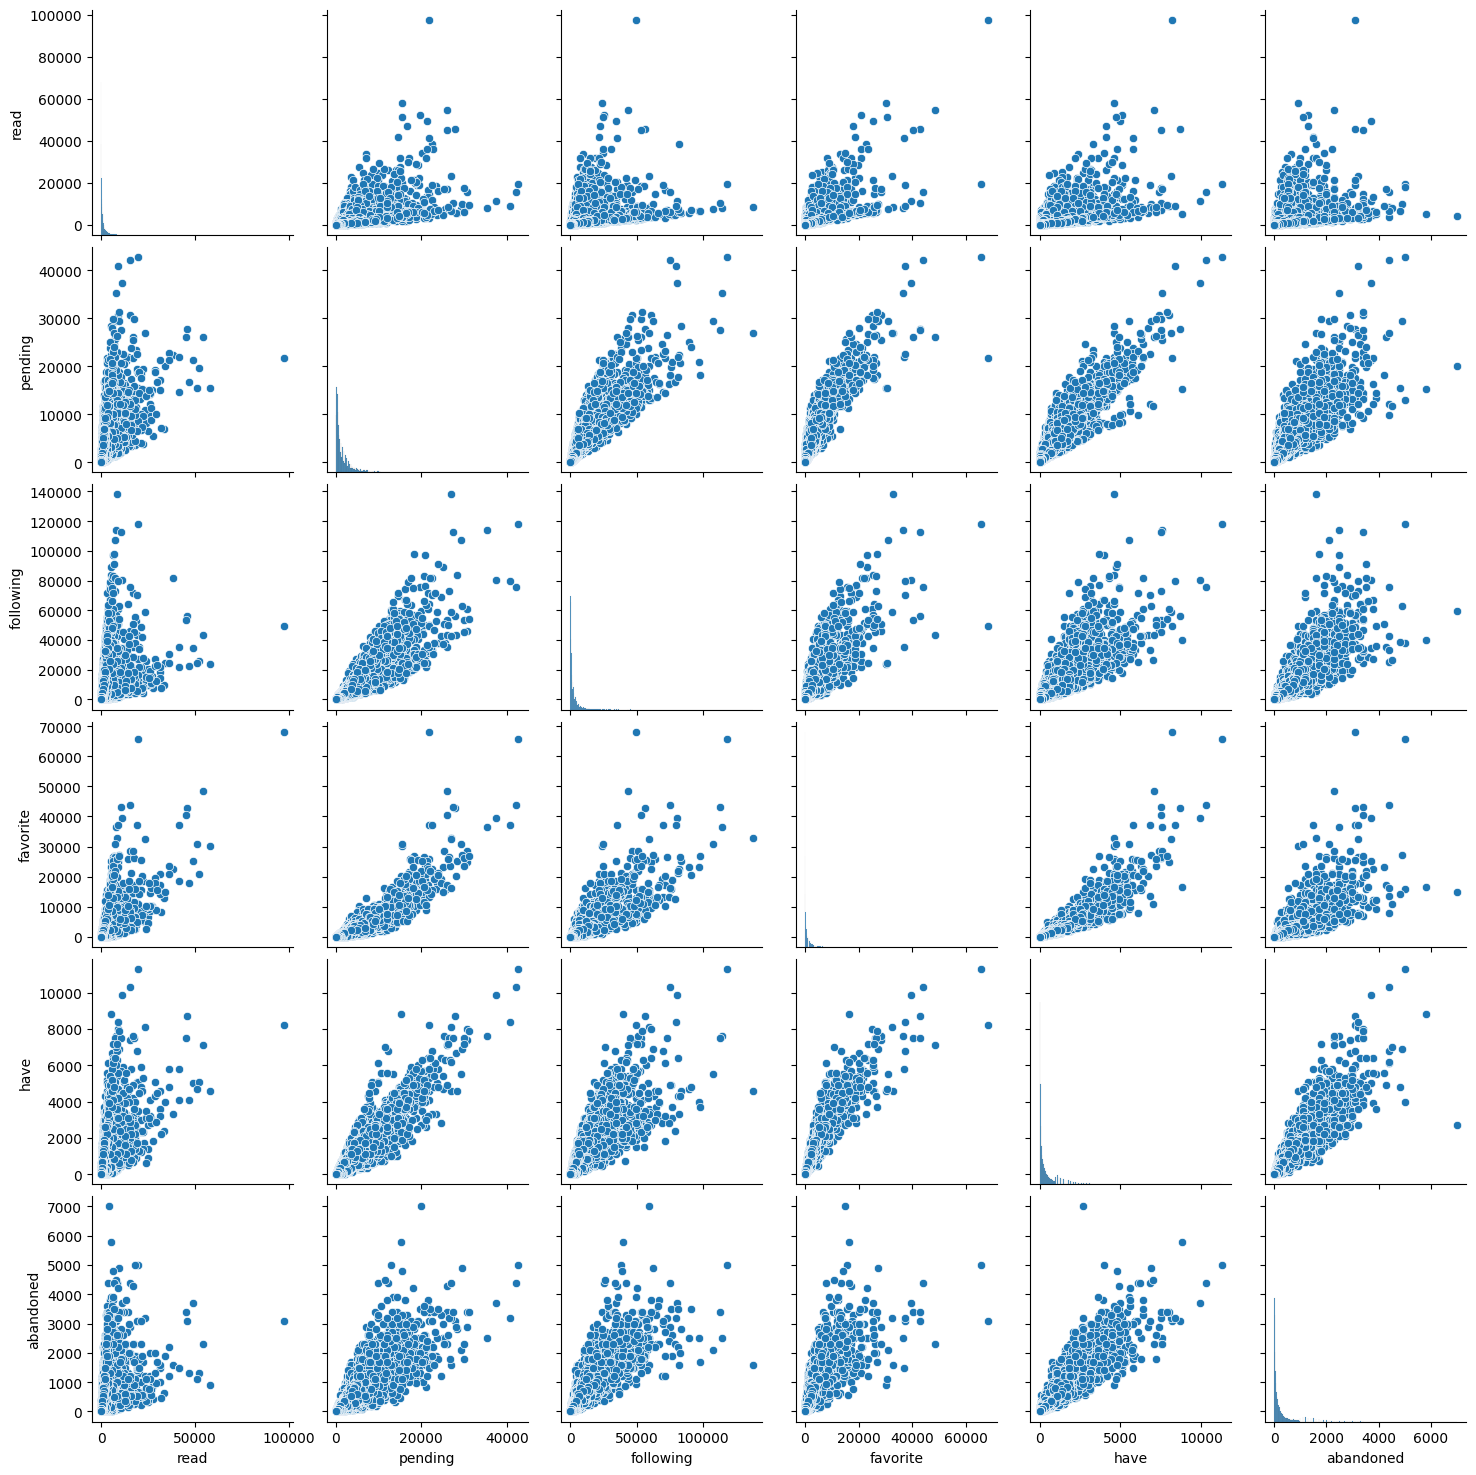

In [15]:
sns.pairplot(data_df[['demography', 'type', 'read', 'pending', 'following', 'favorite', 'have', 'abandoned']]);

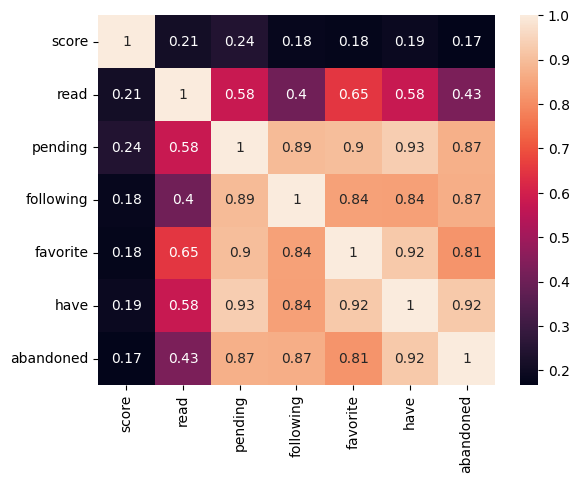

In [16]:
sns.heatmap(data_df[['score', 'read', 'pending', 'following', 'favorite', 'have', 'abandoned']].corr(), annot=True);

In [17]:
mean_scored = data_df['score'].mean()

In [18]:
mean_score_by_type = data_df.groupby('type')['score'].mean()
data_df['type_score'] = data_df['type'].map(mean_score_by_type).fillna(mean_scored)

In [19]:
mean_score_by_demography = data_df.groupby('demography')['score'].mean()
data_df['demography_score'] = data_df['demography'].map(mean_score_by_demography).fillna(mean_scored)

In [20]:
data_df['book_status'].unique()

array(['FINALIZADO', 'PUBLICÁNDOSE', 'PAUSADO', 'CANCELADO'], dtype=object)

In [21]:
book_status_dict = {'FINALIZADO': 0, 'PUBLICÁNDOSE': 1, 'PAUSADO': 2, 'CANCELADO': 3}

In [22]:
data_df['book_status_score'] = data_df['book_status'].map(book_status_dict)

In [23]:
data_df['book_status_score'].describe()

count    19039.000000
mean         0.459846
std          0.603638
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          3.000000
Name: book_status_score, dtype: float64

In [24]:
data_df["Aventura"].replace({ True: 1, False: 0 })

0        0
1        0
2        0
3        0
4        0
        ..
19068    1
19069    0
19070    0
19071    1
19072    1
Name: Aventura, Length: 19039, dtype: int64

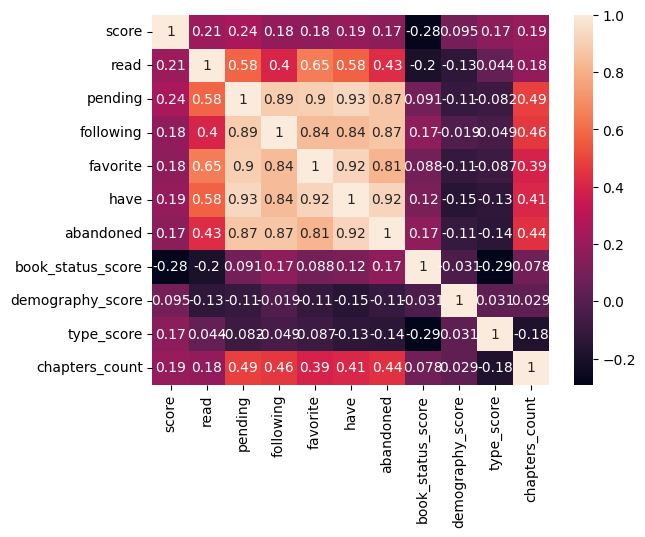

In [25]:
sns.heatmap(data_df[['score', 'read', 'pending', 'following', 'favorite', 'have', 'abandoned', 'book_status_score', 'demography_score', 'type_score', 'chapters_count']].corr(), annot=True);

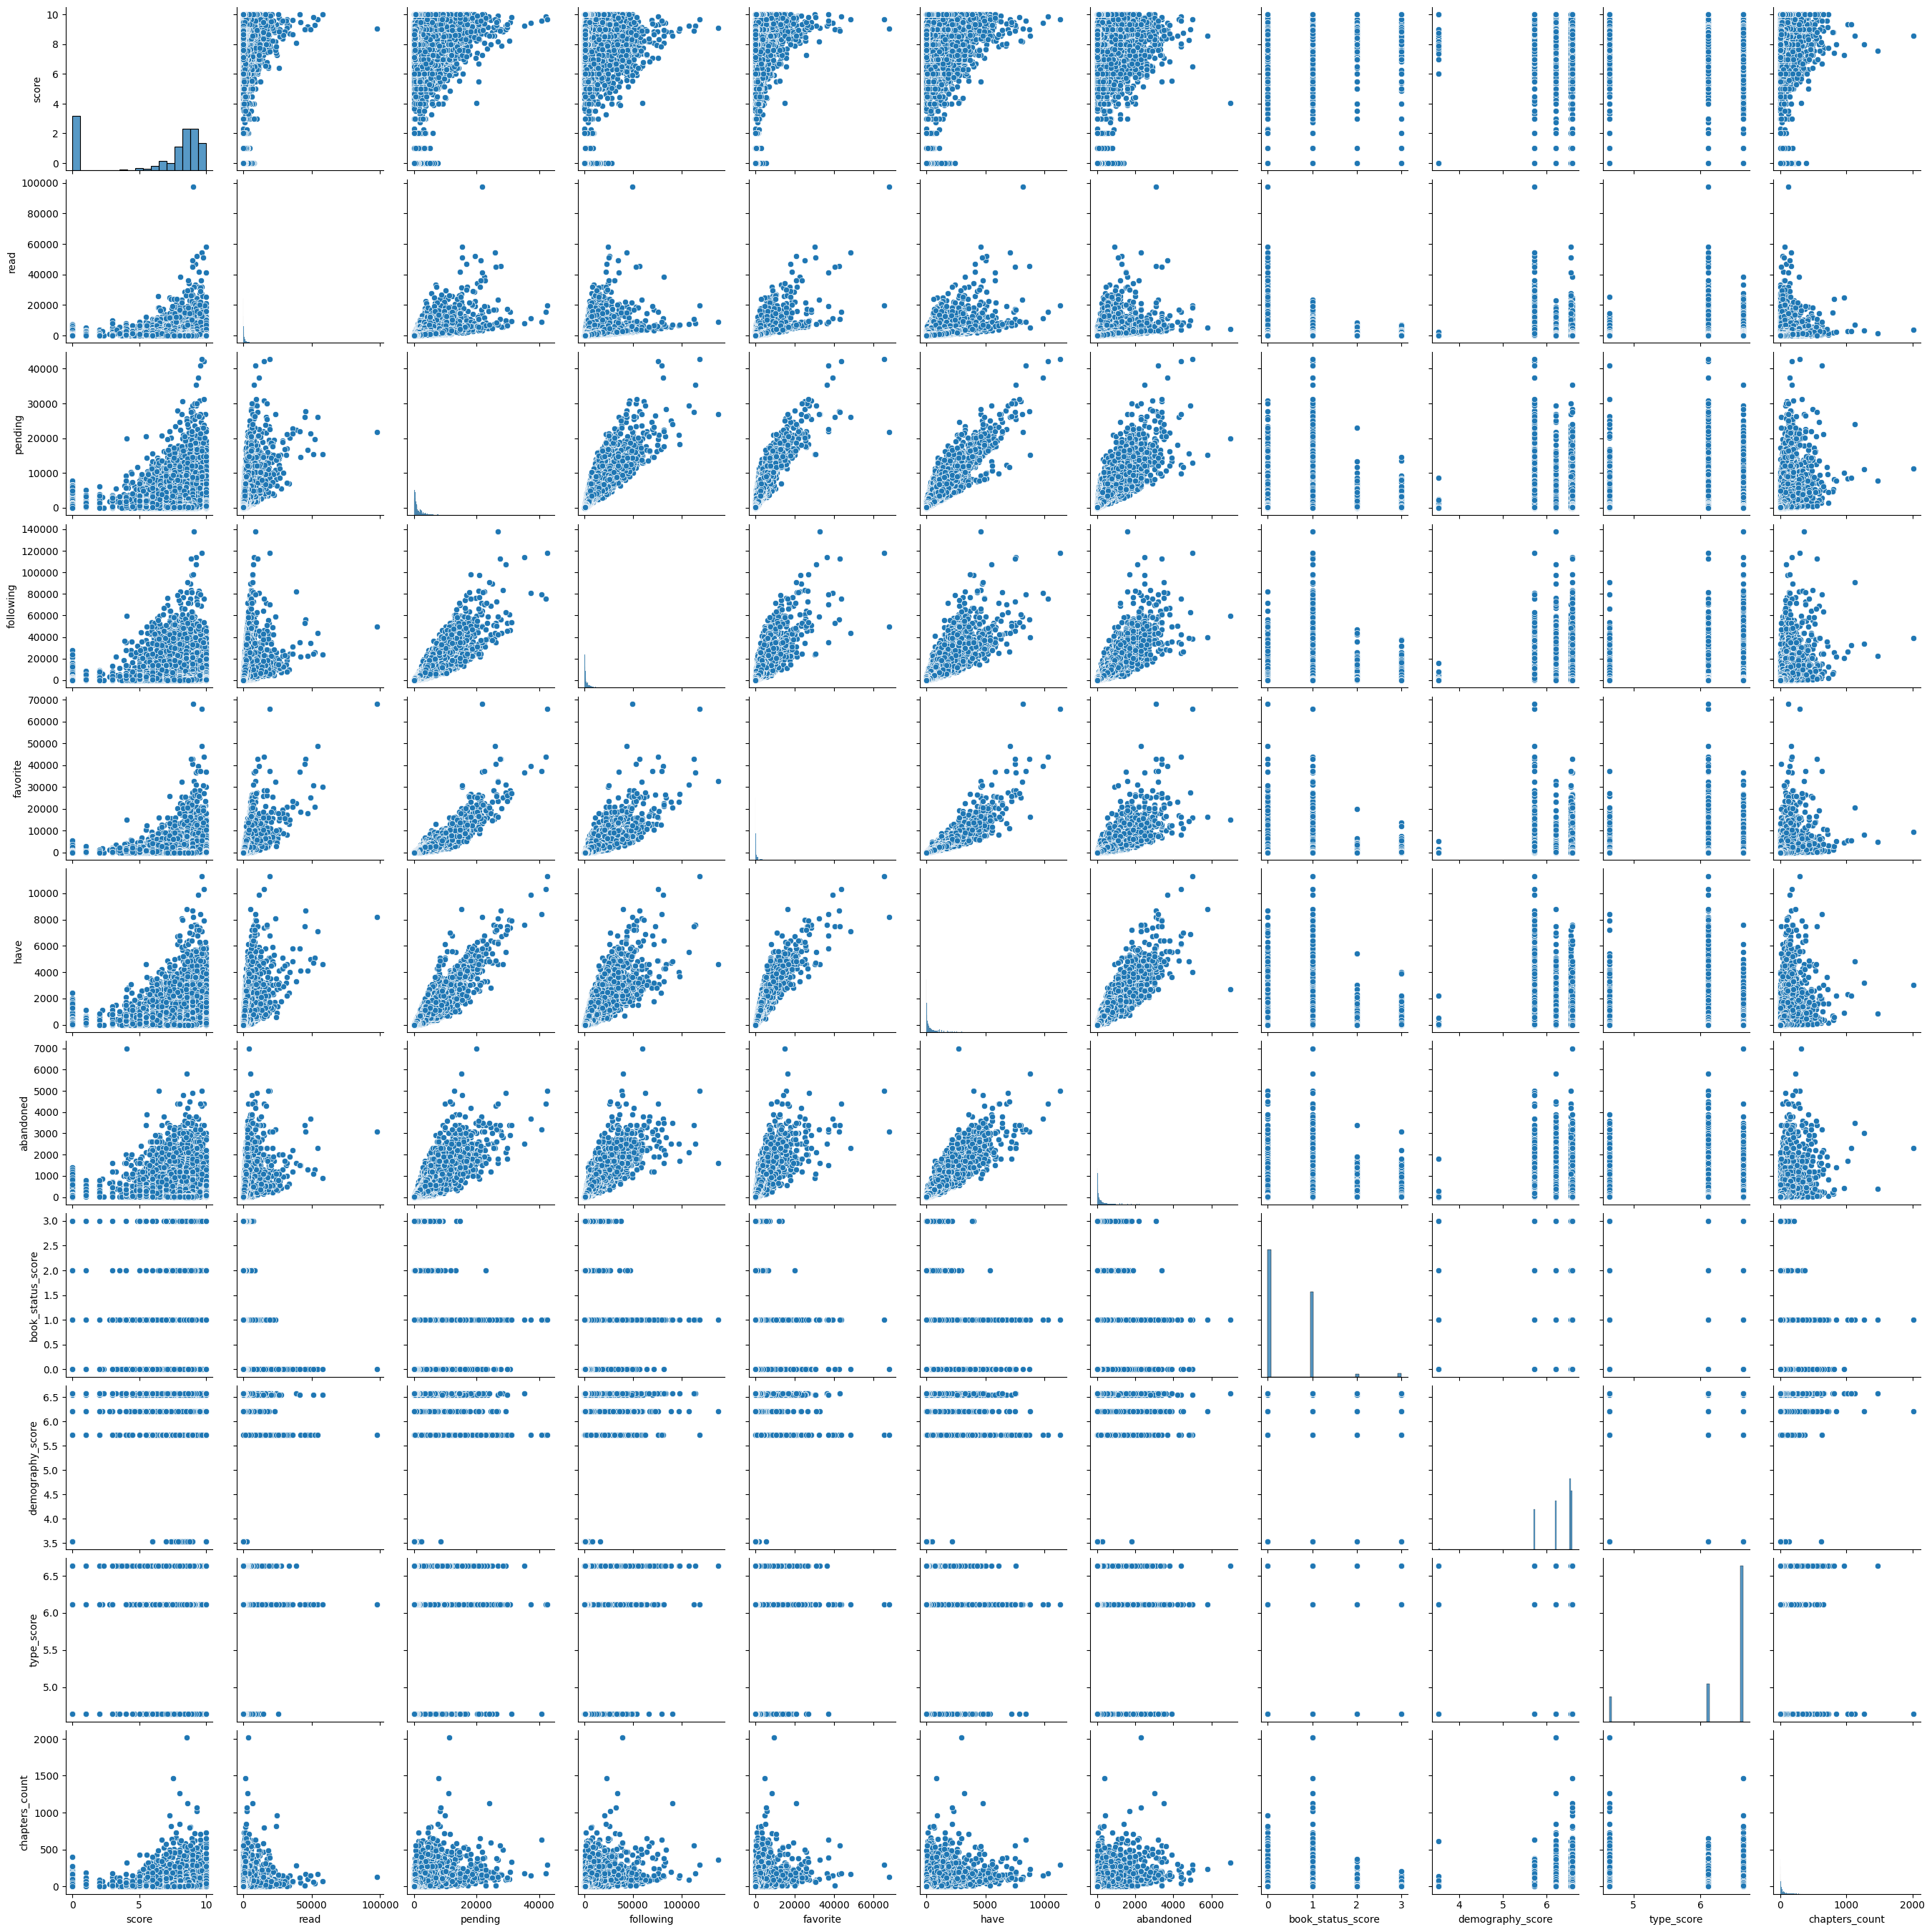

In [26]:
sns.pairplot(data_df[['score', 'read', 'pending', 'following', 'favorite', 'have', 'abandoned', 'book_status_score', 'demography_score', 'type_score', 'chapters_count']]);

In [27]:
mean_scored = data_df['score'].mean()

for genre in genre_list:
    mean_score_by_genre = data_df.groupby(genre)['score'].mean()           
    data_df[f'{genre}_score'] = data_df[genre].replace({ True: mean_score_by_genre[1], False: 0 })


In [28]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19039 entries, 0 to 19072
Columns: 117 entries, synopsis to Familia_score
dtypes: bool(49), float64(59), int64(1), object(8)
memory usage: 10.9+ MB


In [29]:
data_df["tdg"] = data_df["genre"].apply(lambda g: True if genre in str(g).split(", ") else False )

In [30]:
data_df["tdg"] = data_df[[col for col in data_df.columns if 'score' in col and col != 0]].mean(axis = 1,skipna = True)

In [31]:
a = data_df[[col for col in data_df.columns if 'score' in col]]

In [32]:
len(a.columns)

53

In [33]:
tdg = [] #np.array([])

In [34]:
def Average(lst):
    avg = sum(lst) / len(lst)
    #print(avg)
    return avg

In [41]:

def mean_row(row):
    lst = [e for e in row if e != 0]
    avg = sum(lst) / len(lst)
    return avg

In [42]:
from statistics import mean 

In [43]:
len(a)

19039

In [44]:
data_df["tdg"] = a.apply(koko, axis=1);

In [45]:
len(tdg)

19039

In [46]:
data_df["tdg"]


0        6.856853
1        5.707131
2        6.745186
3        6.789863
4        6.081713
           ...   
19068    5.475043
19069    6.629599
19070    6.419655
19071    6.402675
19072    6.297454
Name: tdg, Length: 19039, dtype: float64

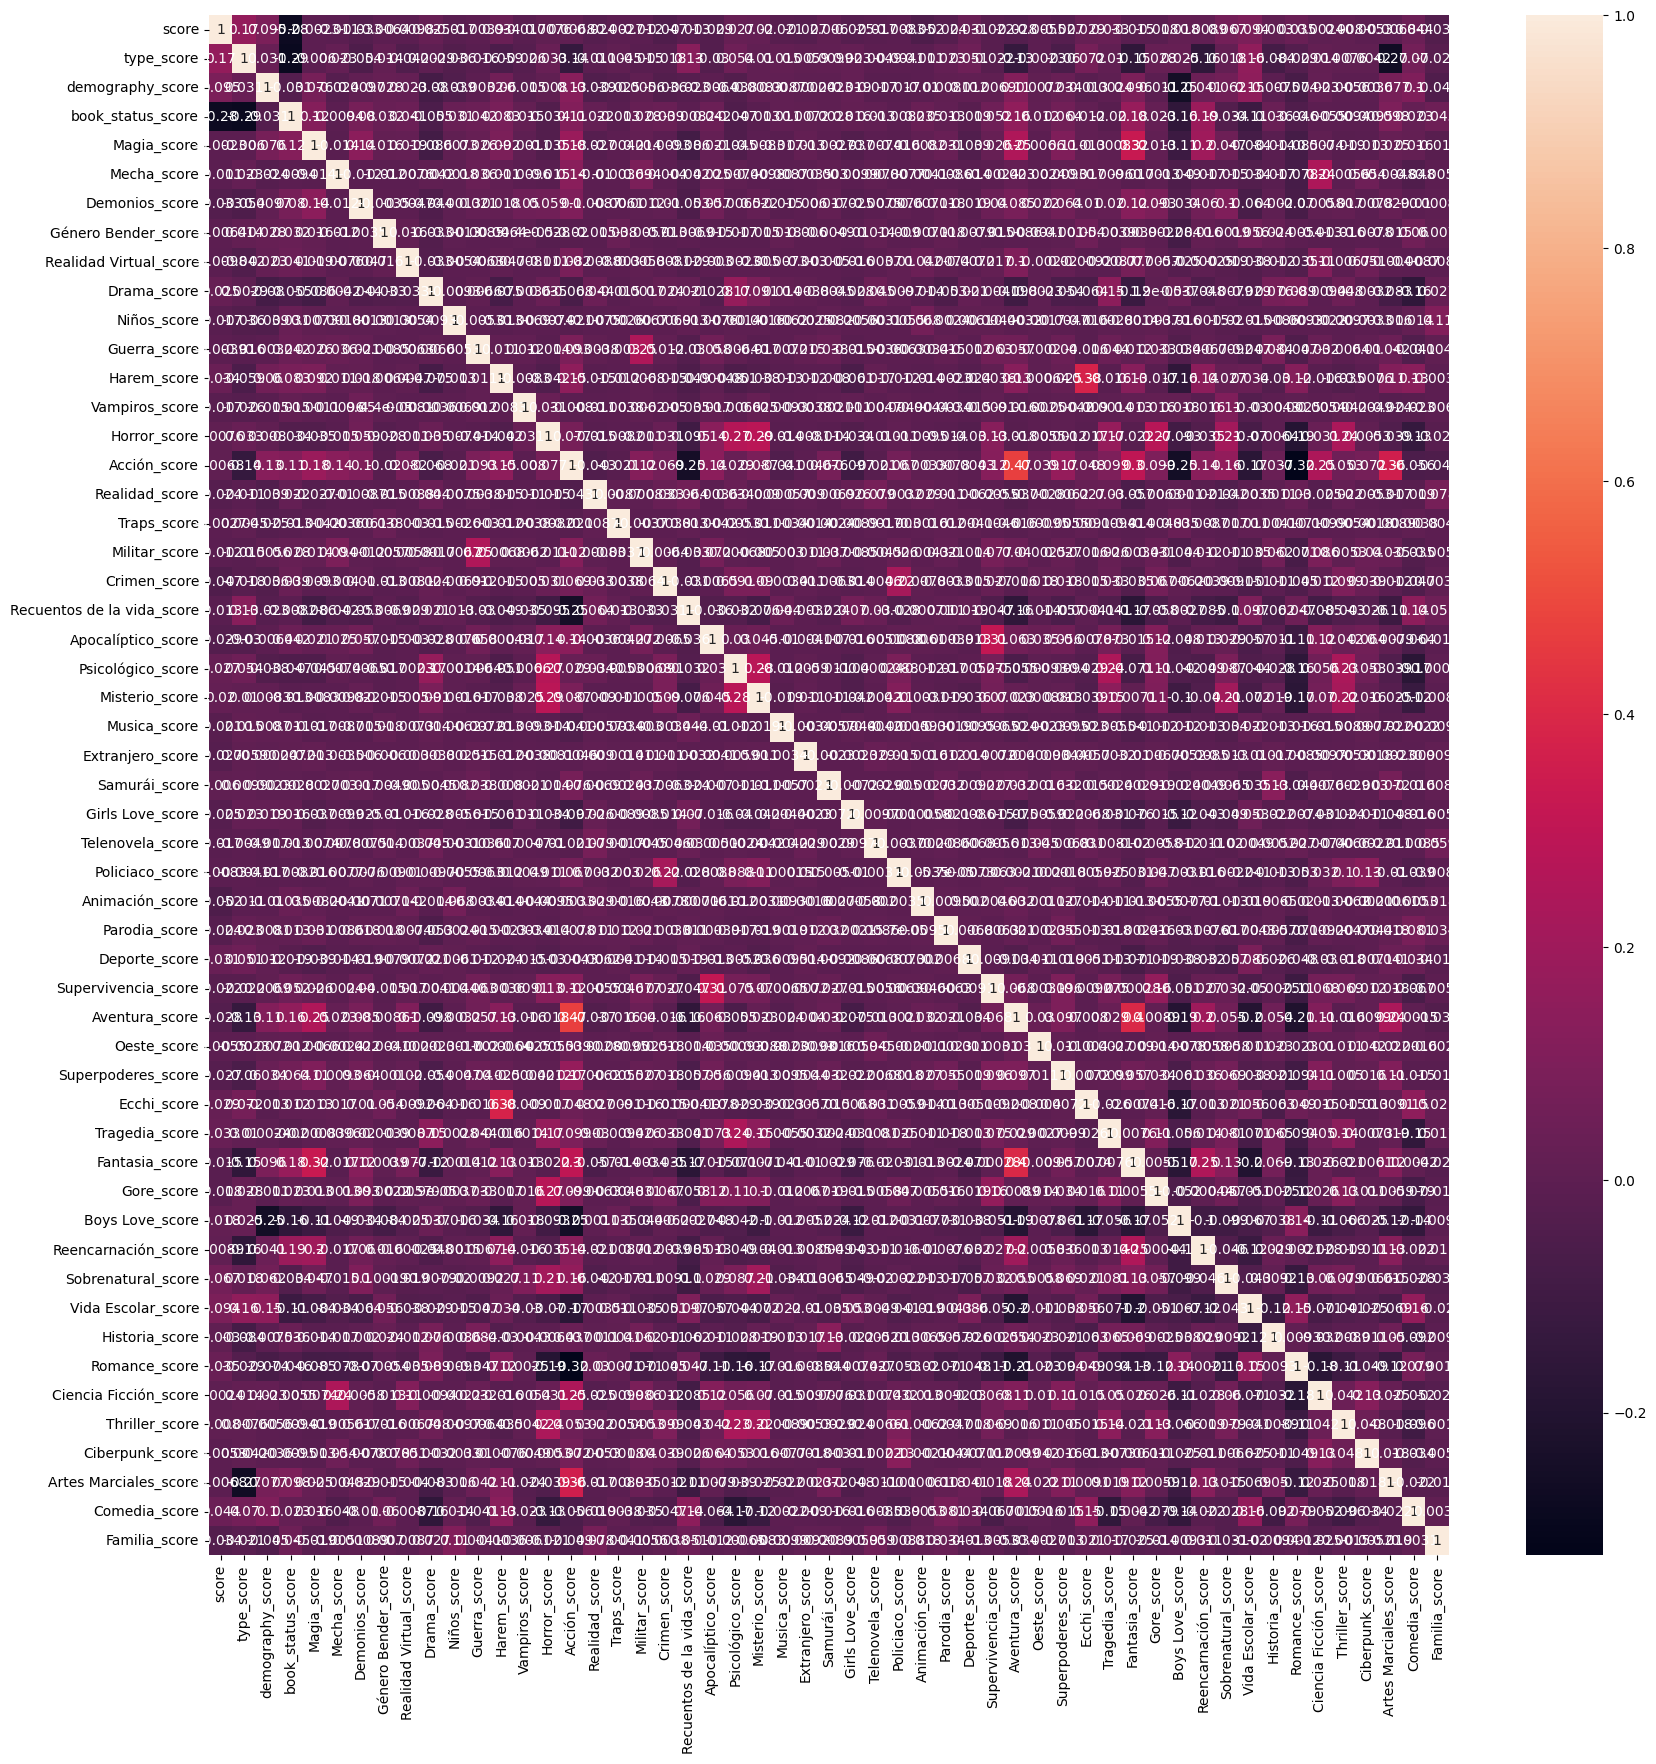

In [53]:
plt.figure(figsize=(20,20))
sns.heatmap(a.corr(), annot=True);

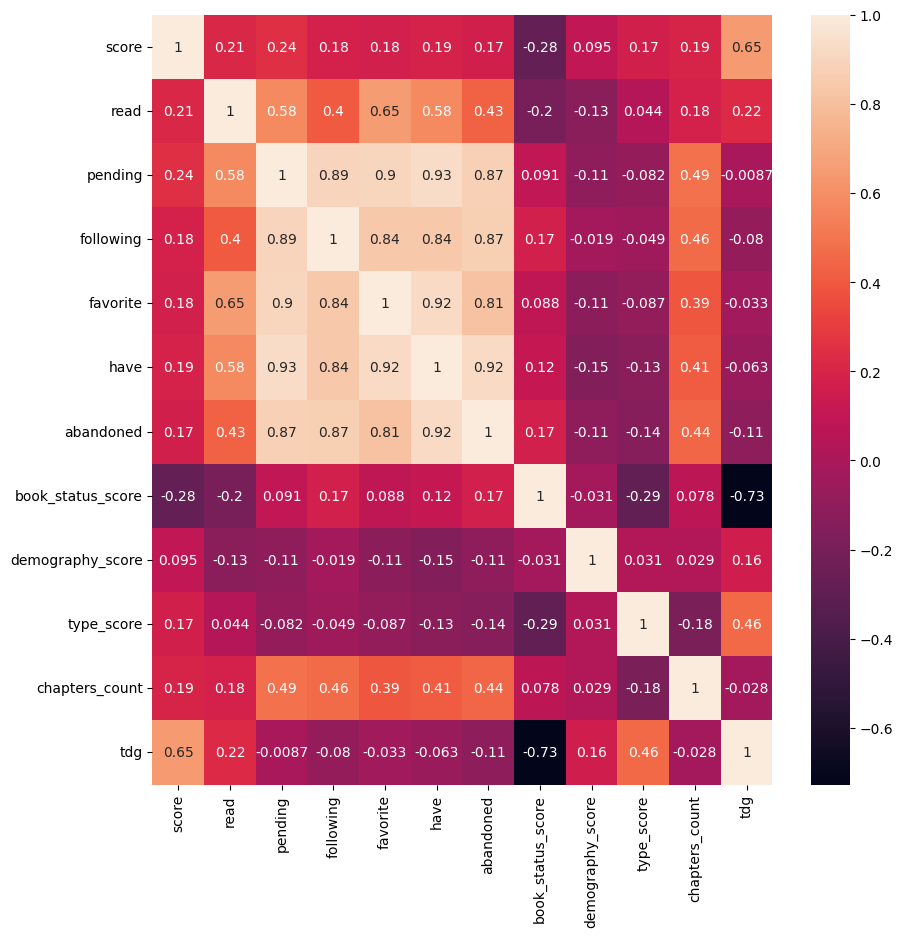

In [55]:
plt.figure(figsize=(10,10))
sns.heatmap(data_df[['score', 'read', 'pending', 'following', 'favorite', 'have', 'abandoned', 'book_status_score', 'demography_score', 'type_score', 'chapters_count', 'tdg']].corr(), annot=True);